In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image
from matplotlib.transforms import Bbox
# import cv2
import random

In [2]:
def div_list(ls,n):
   result = []
   cut = int(len(ls)/n)
   if cut == 0:
       ls = [[x] for x in ls]
       none_array = [[] for i in range(0, n-len(ls))]
       return ls+none_array
   for i in range(0, n-1):
       result.append(ls[cut*i:cut*(1+i)])
   result.append(ls[cut*(n-1):len(ls)])
   return result

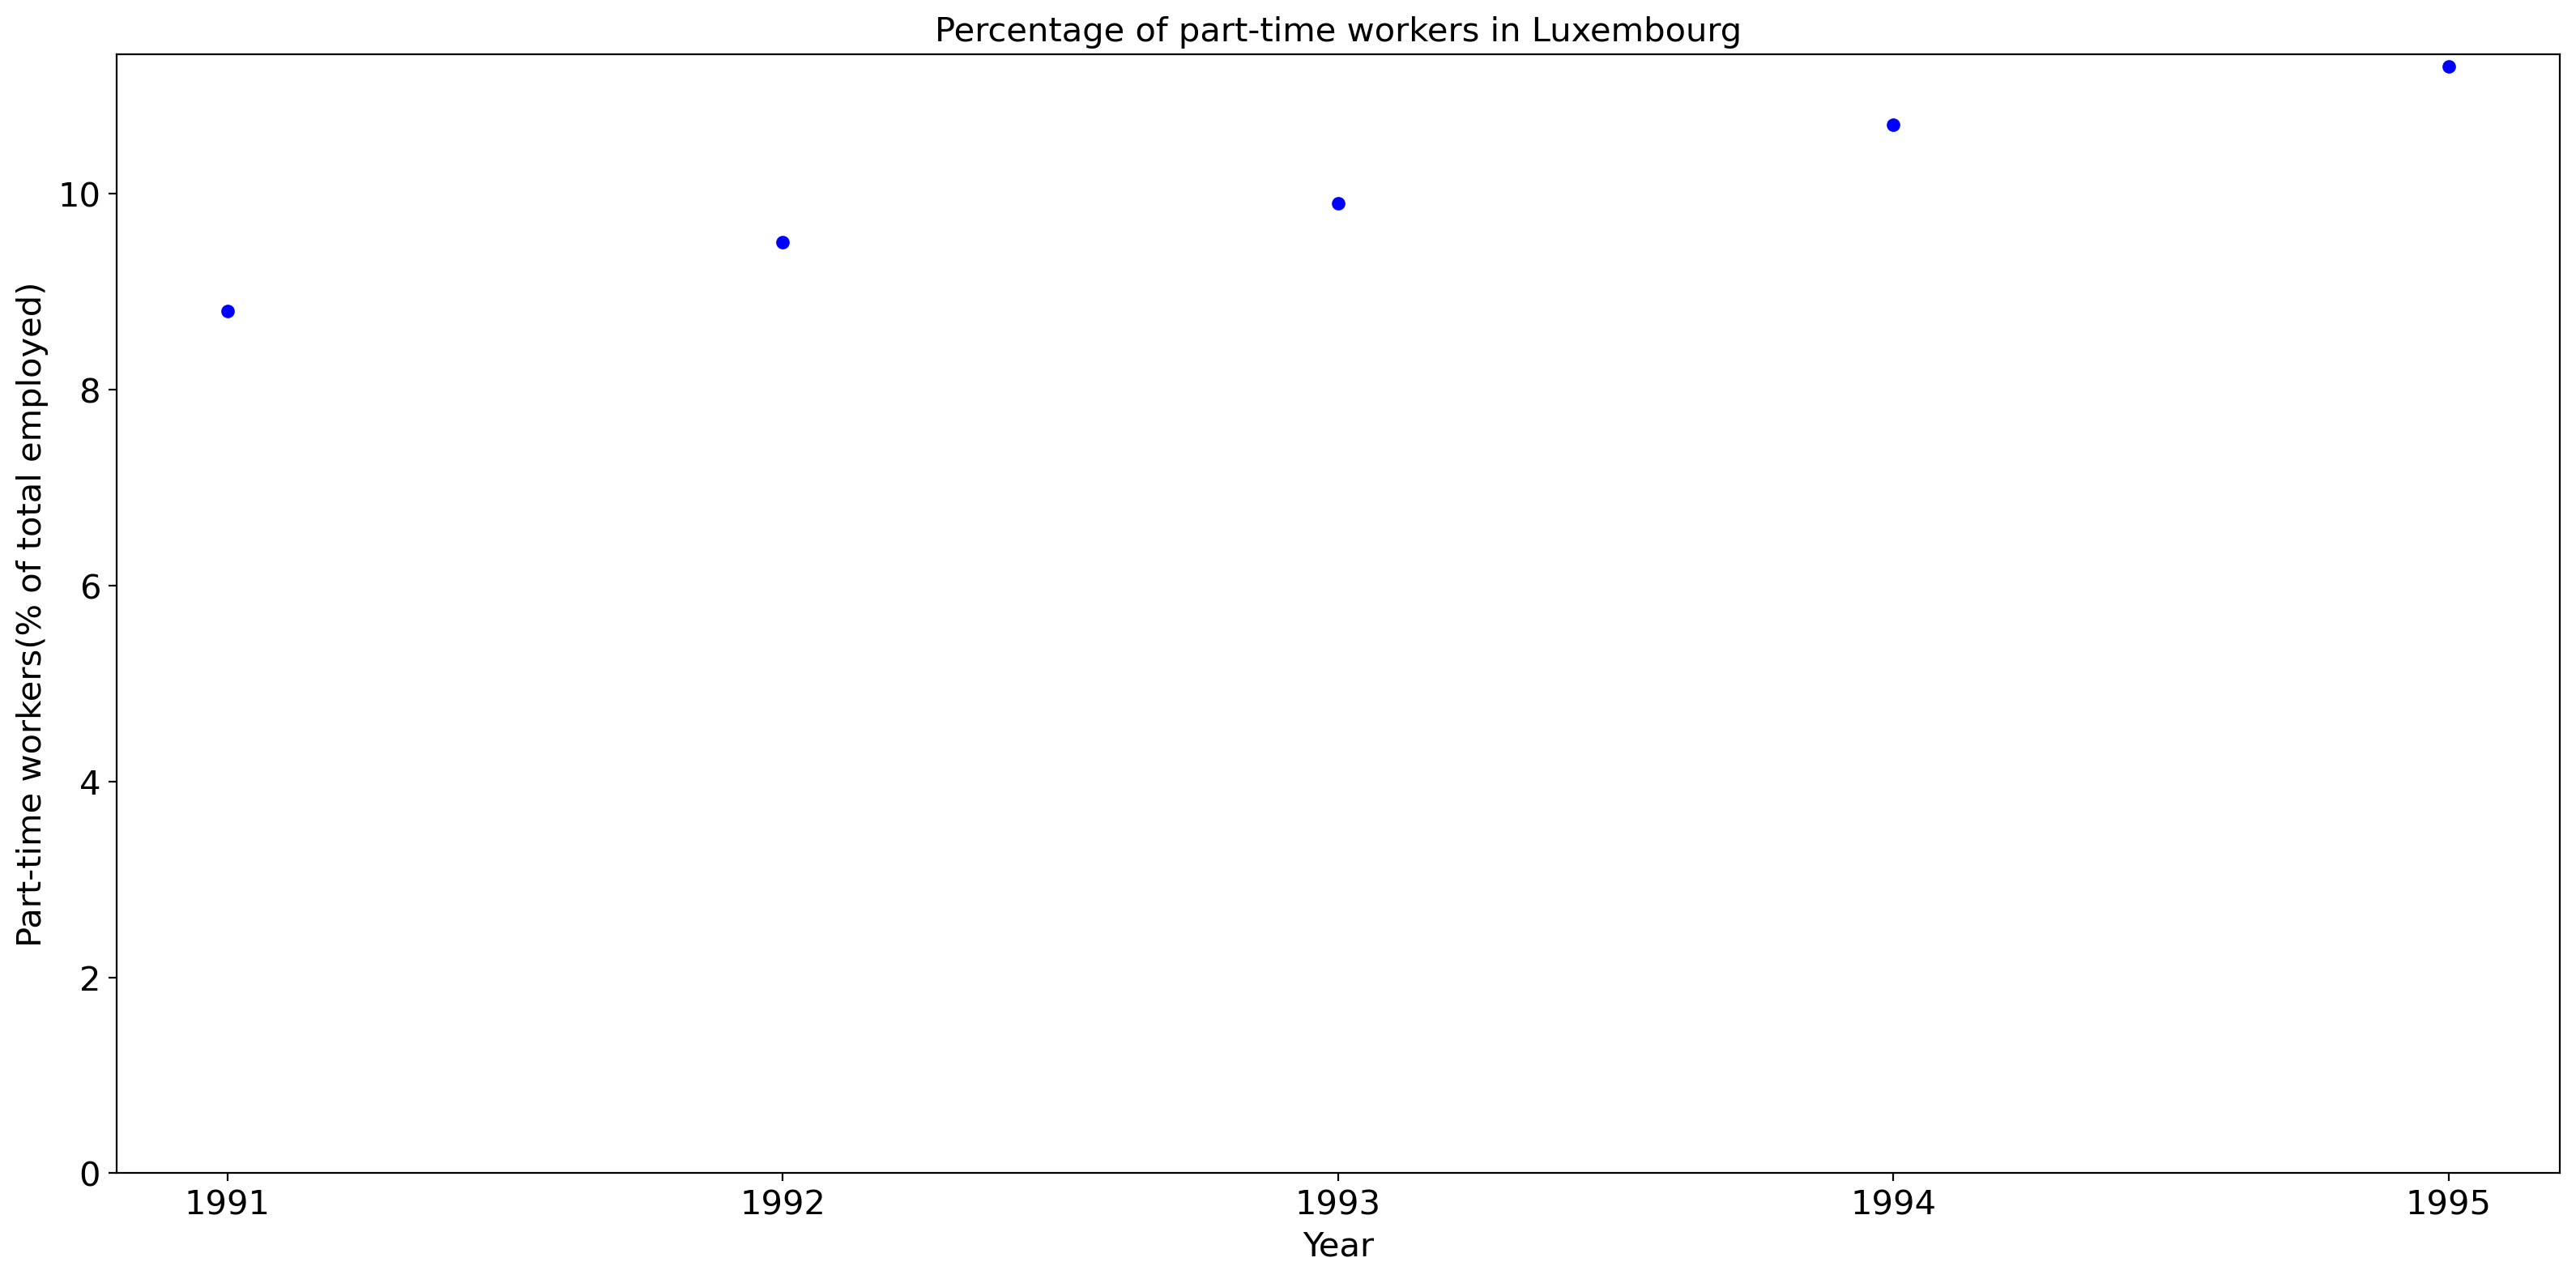

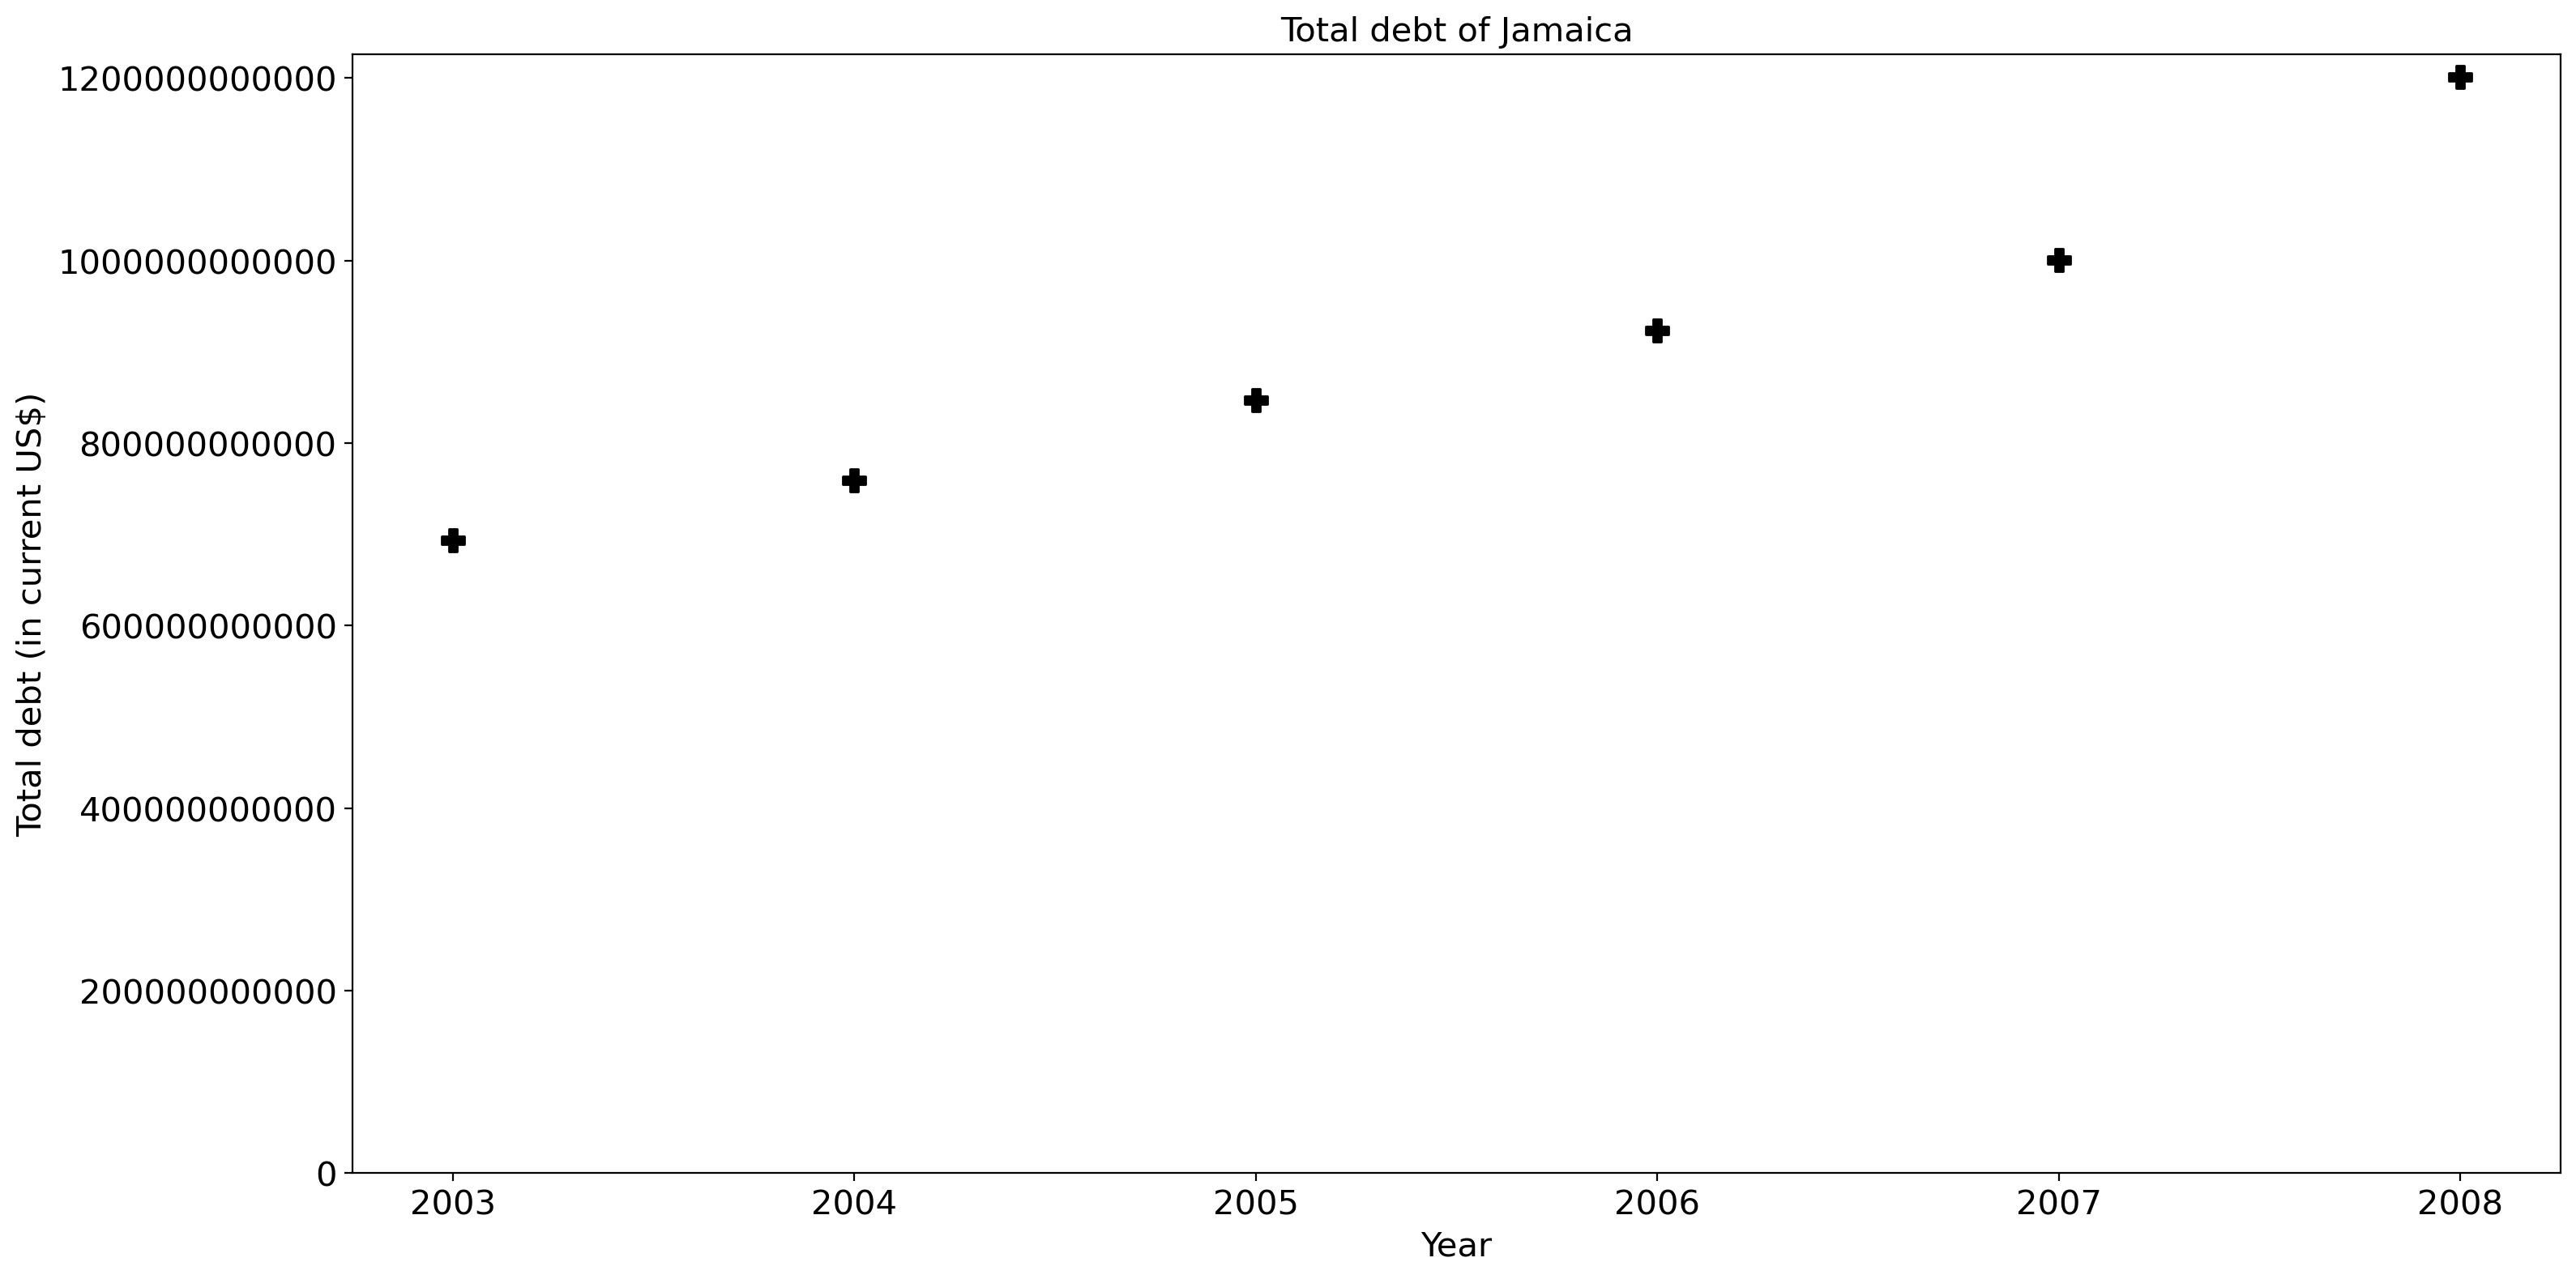

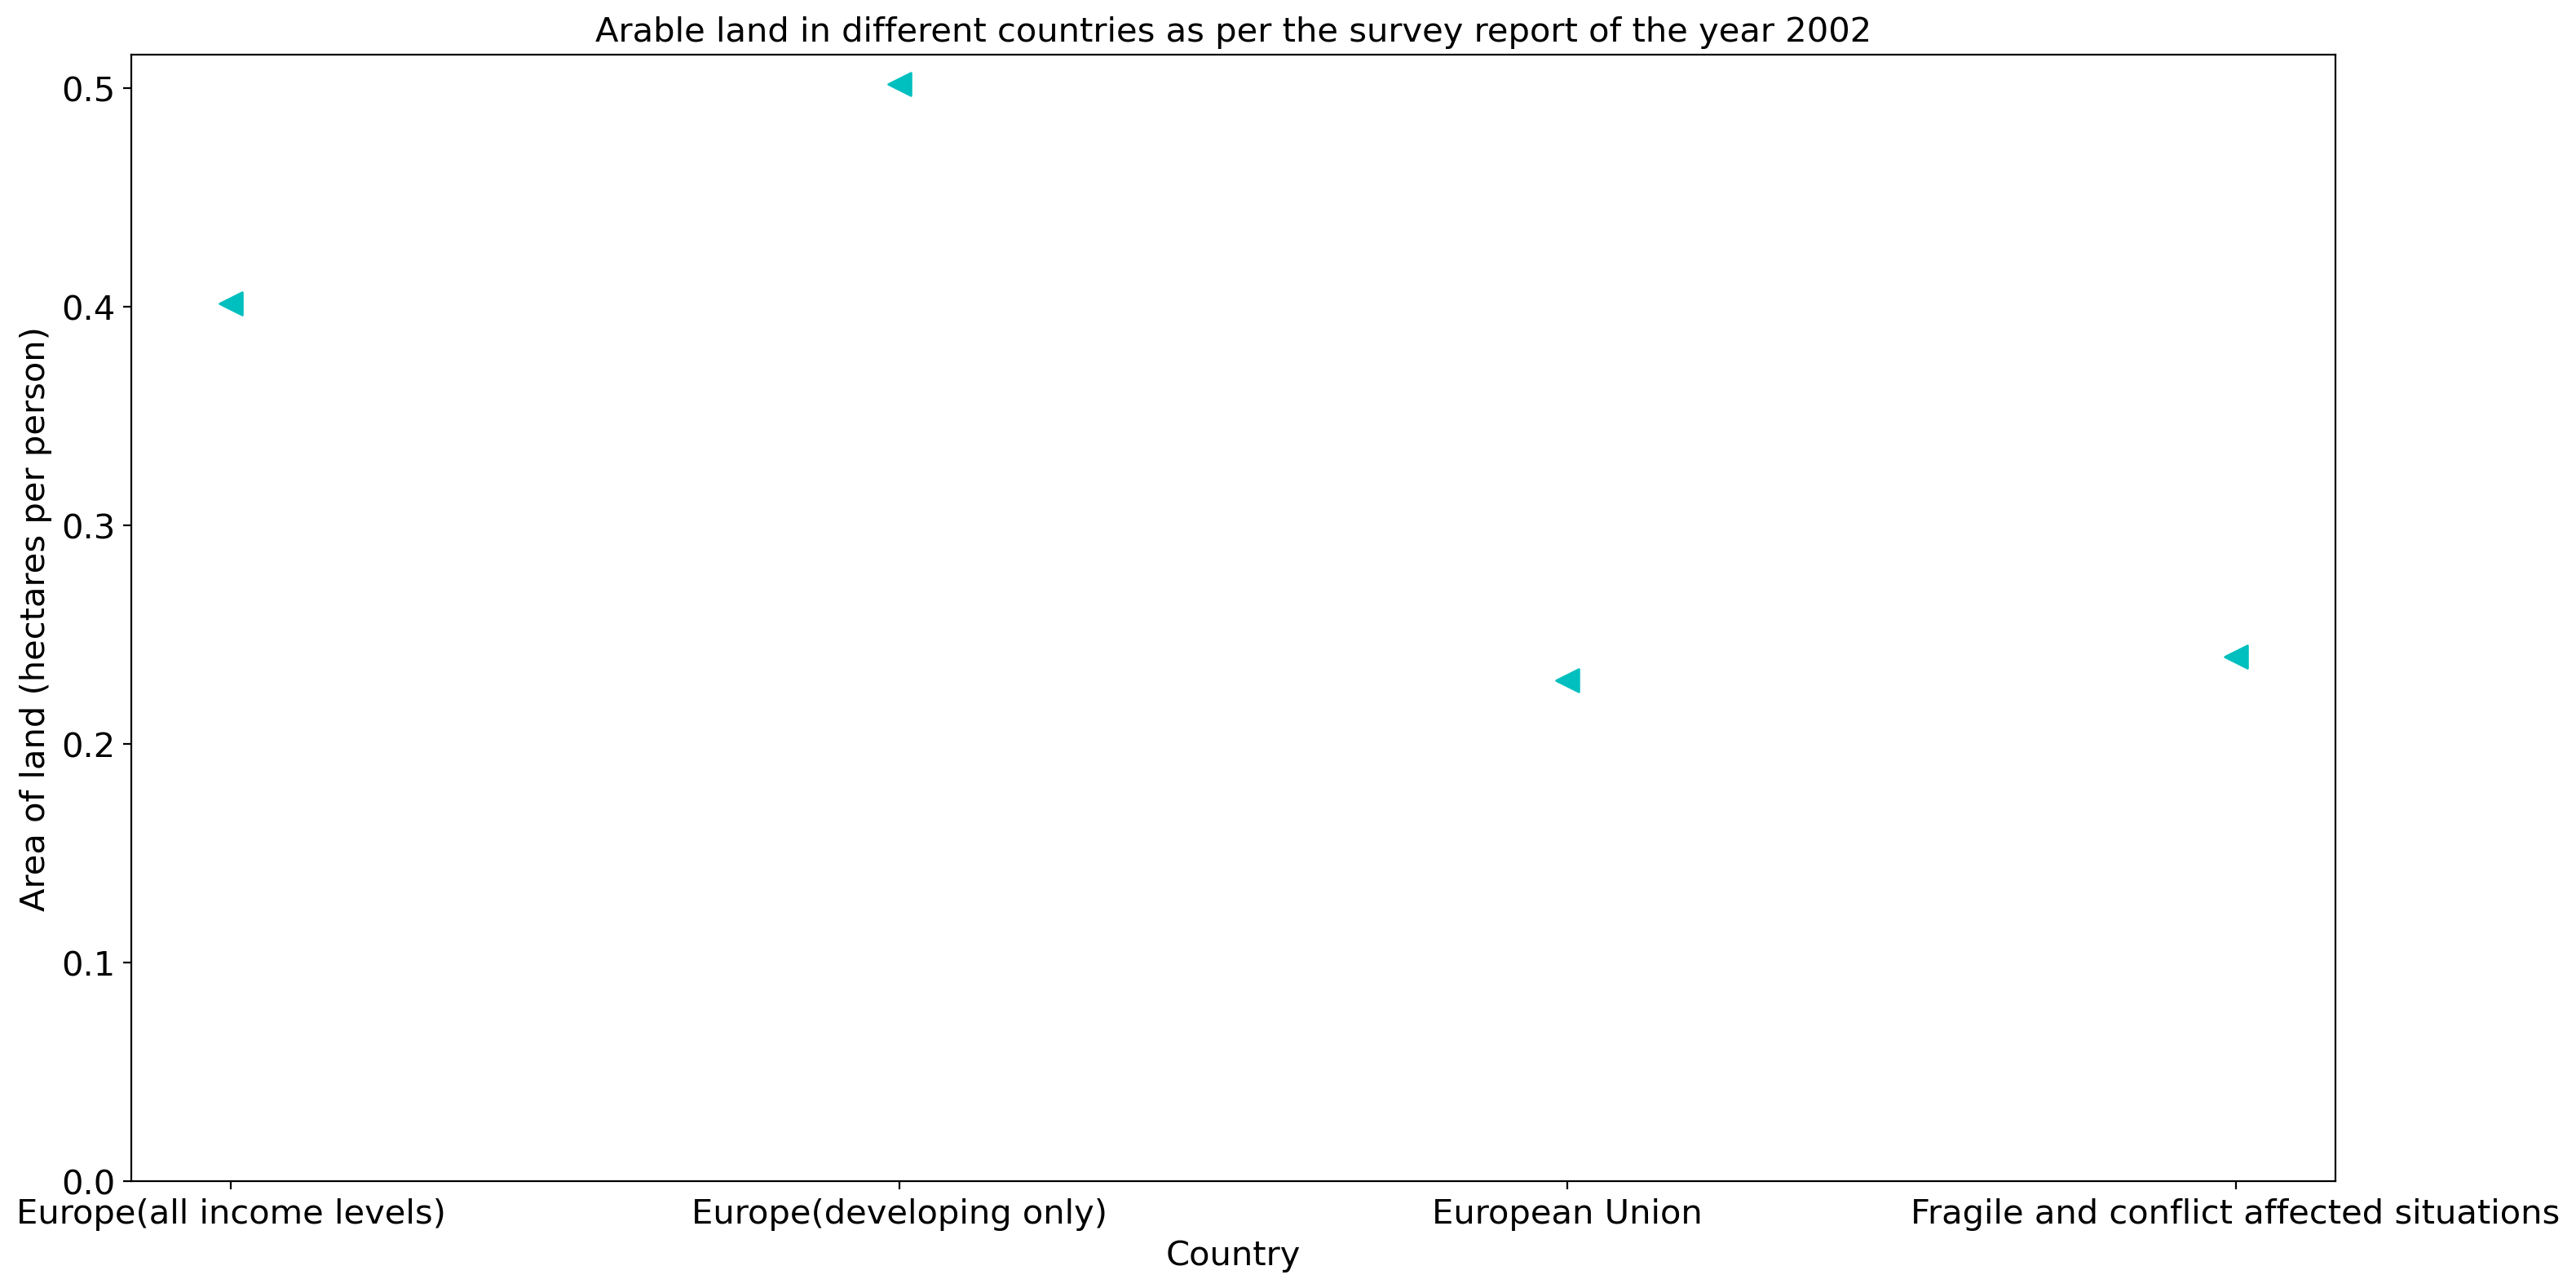

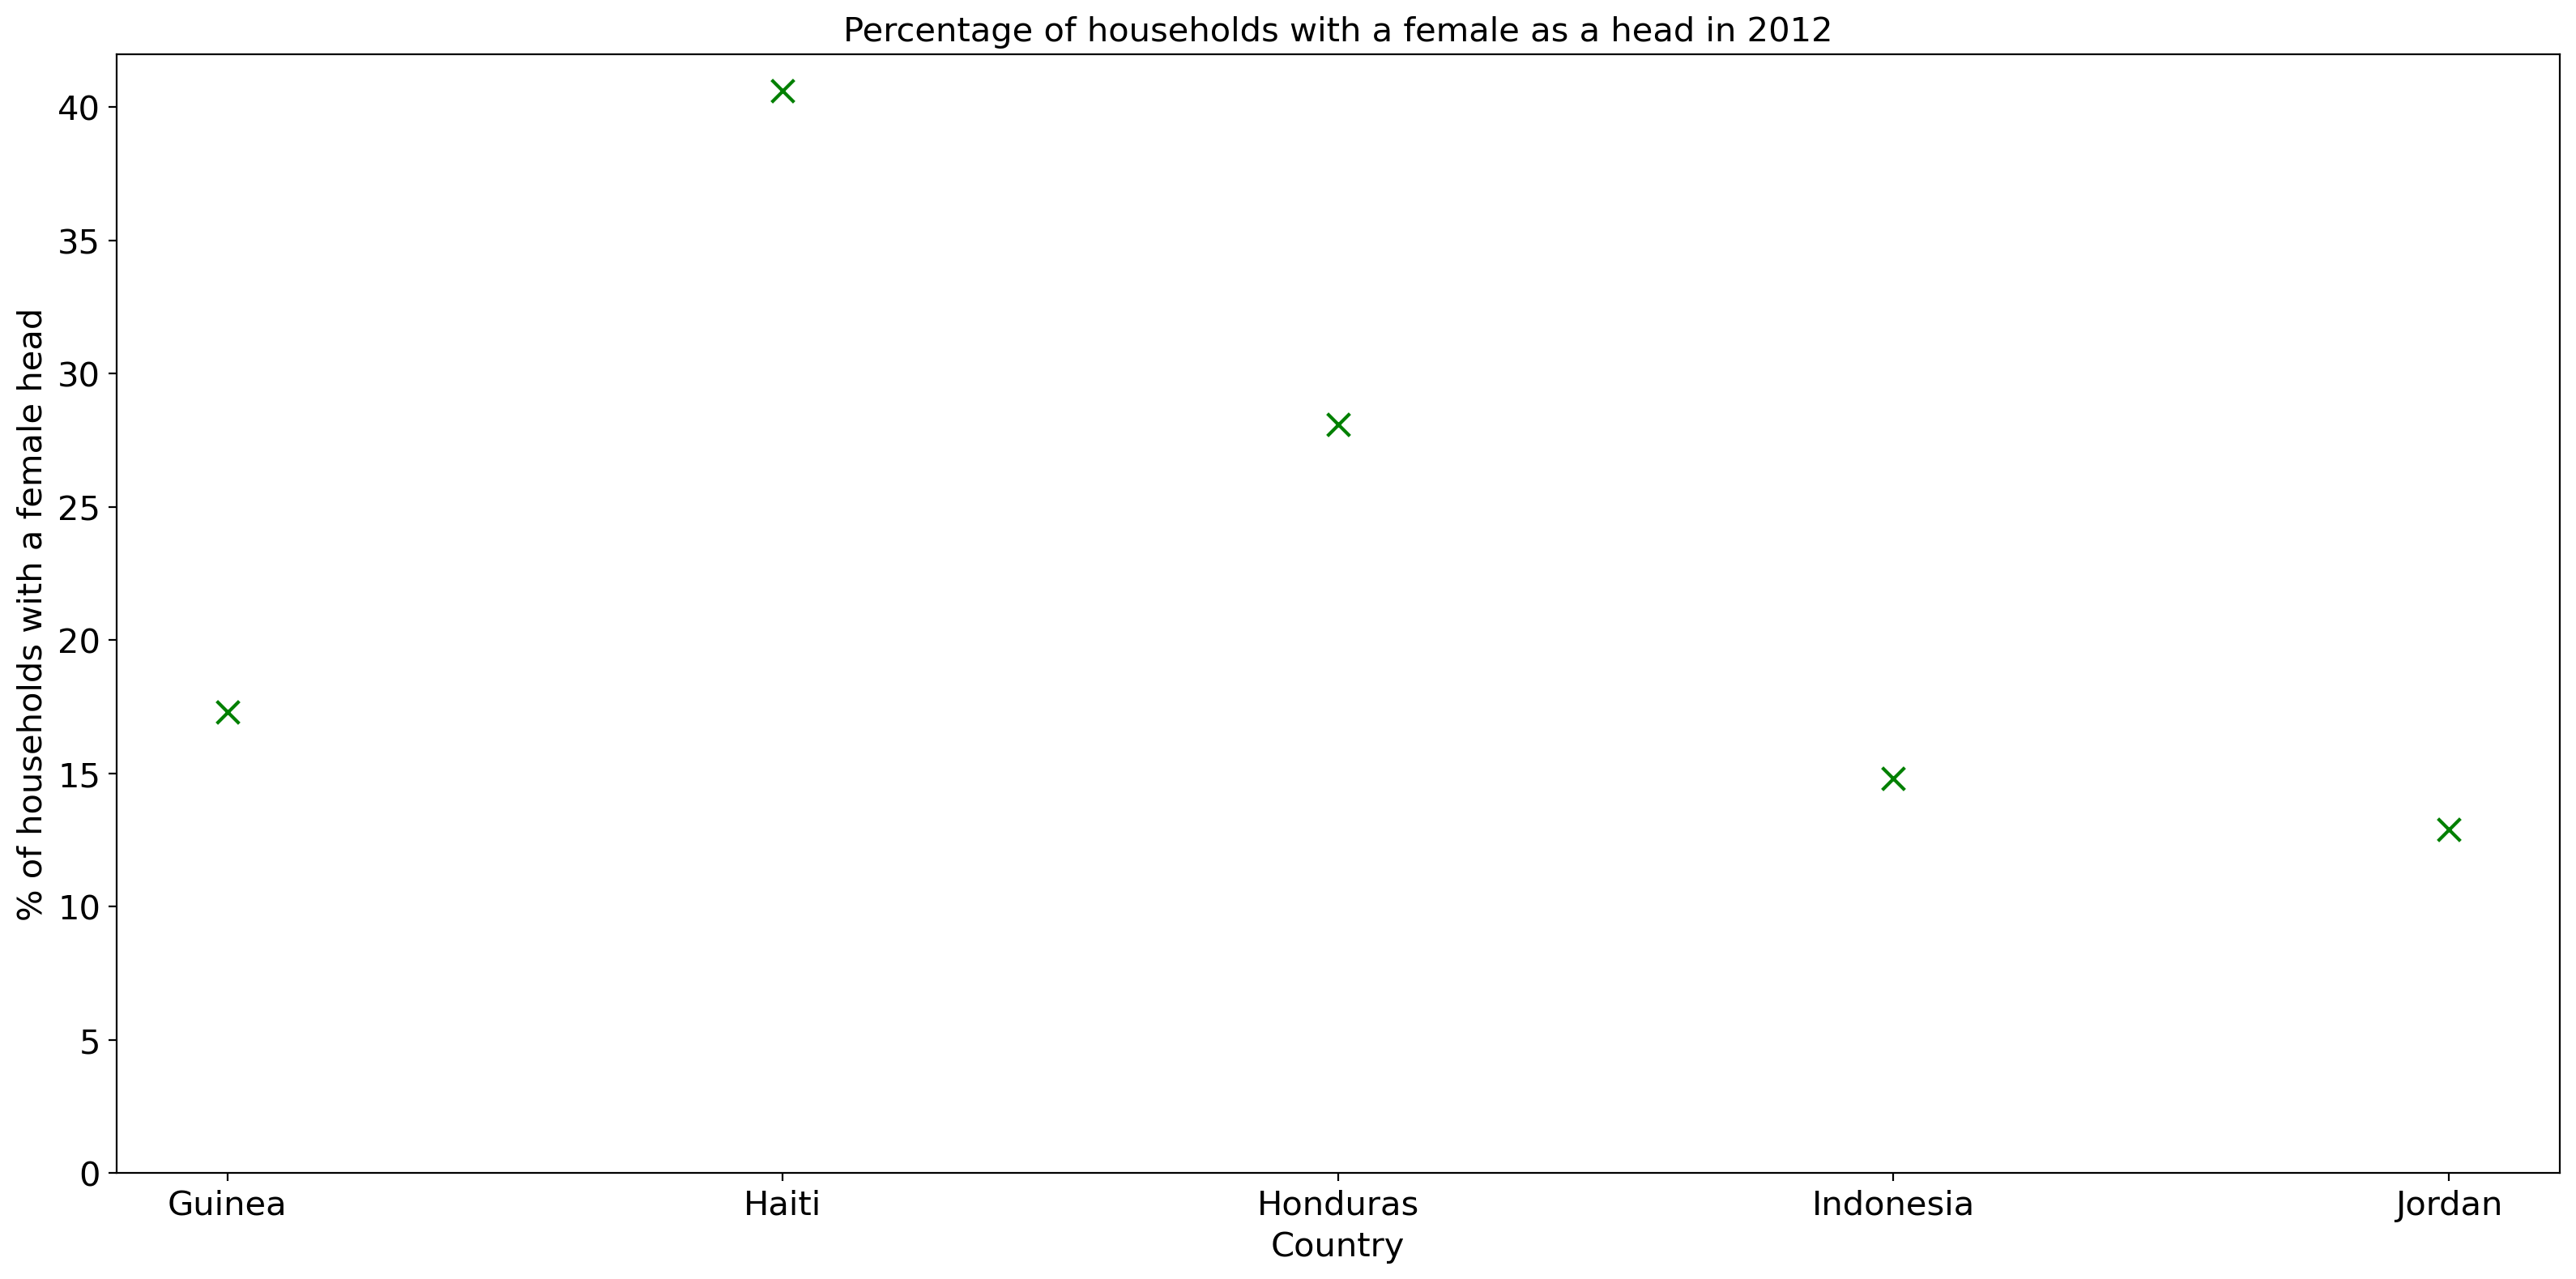

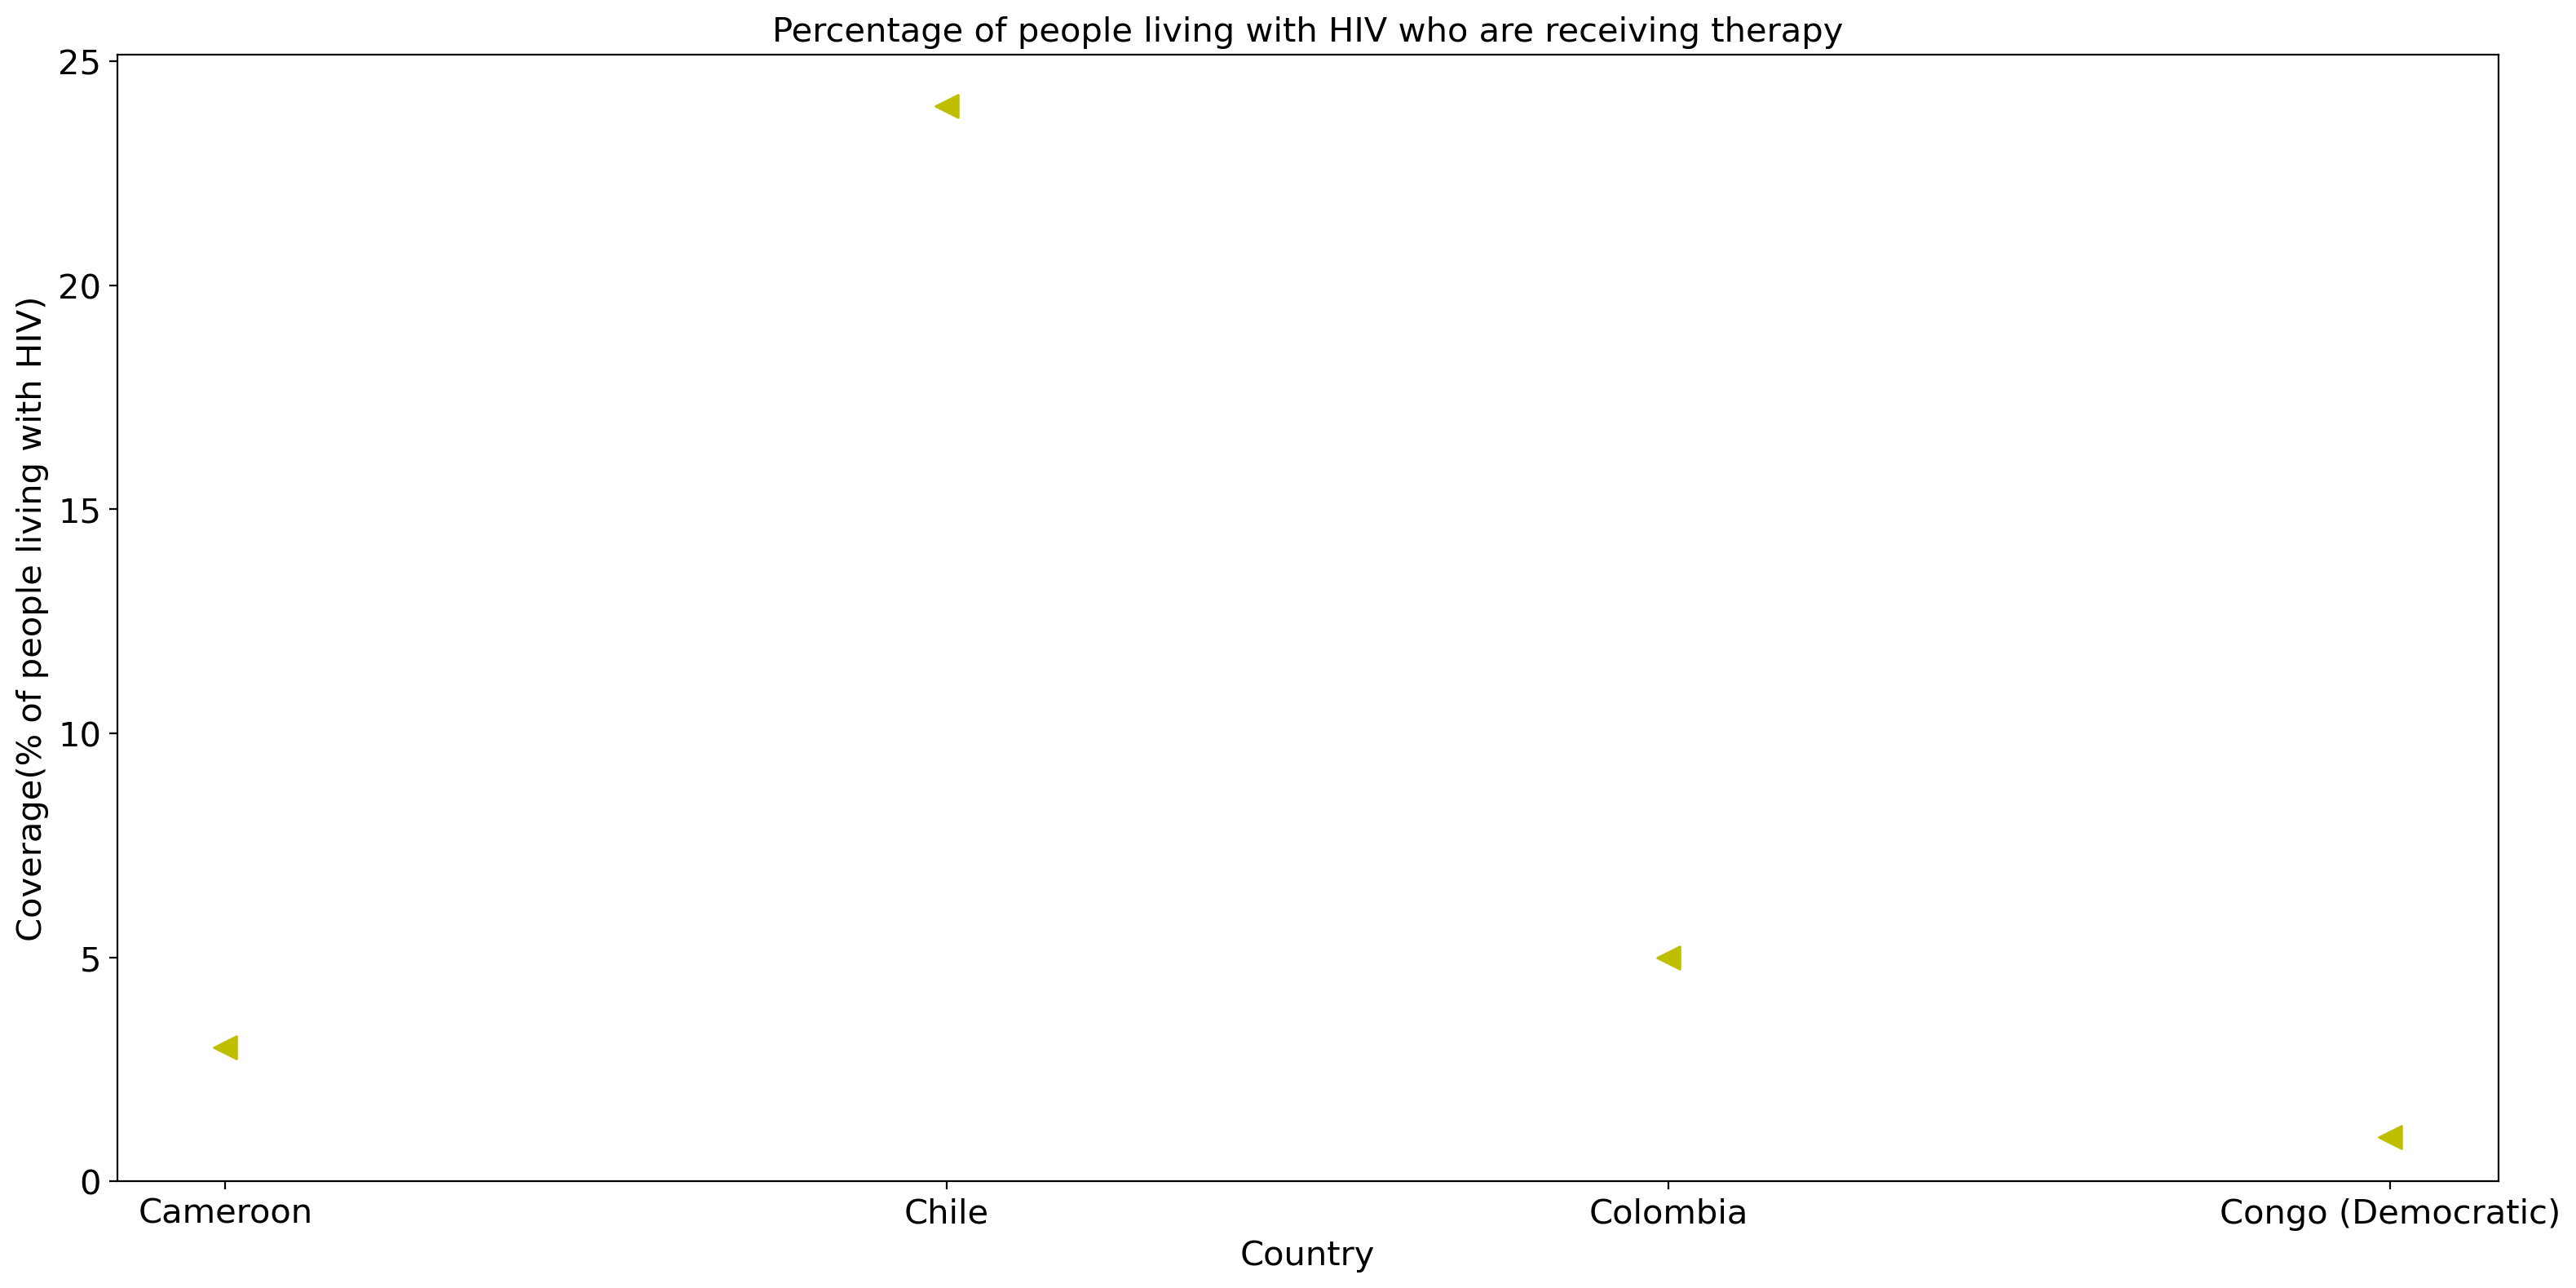

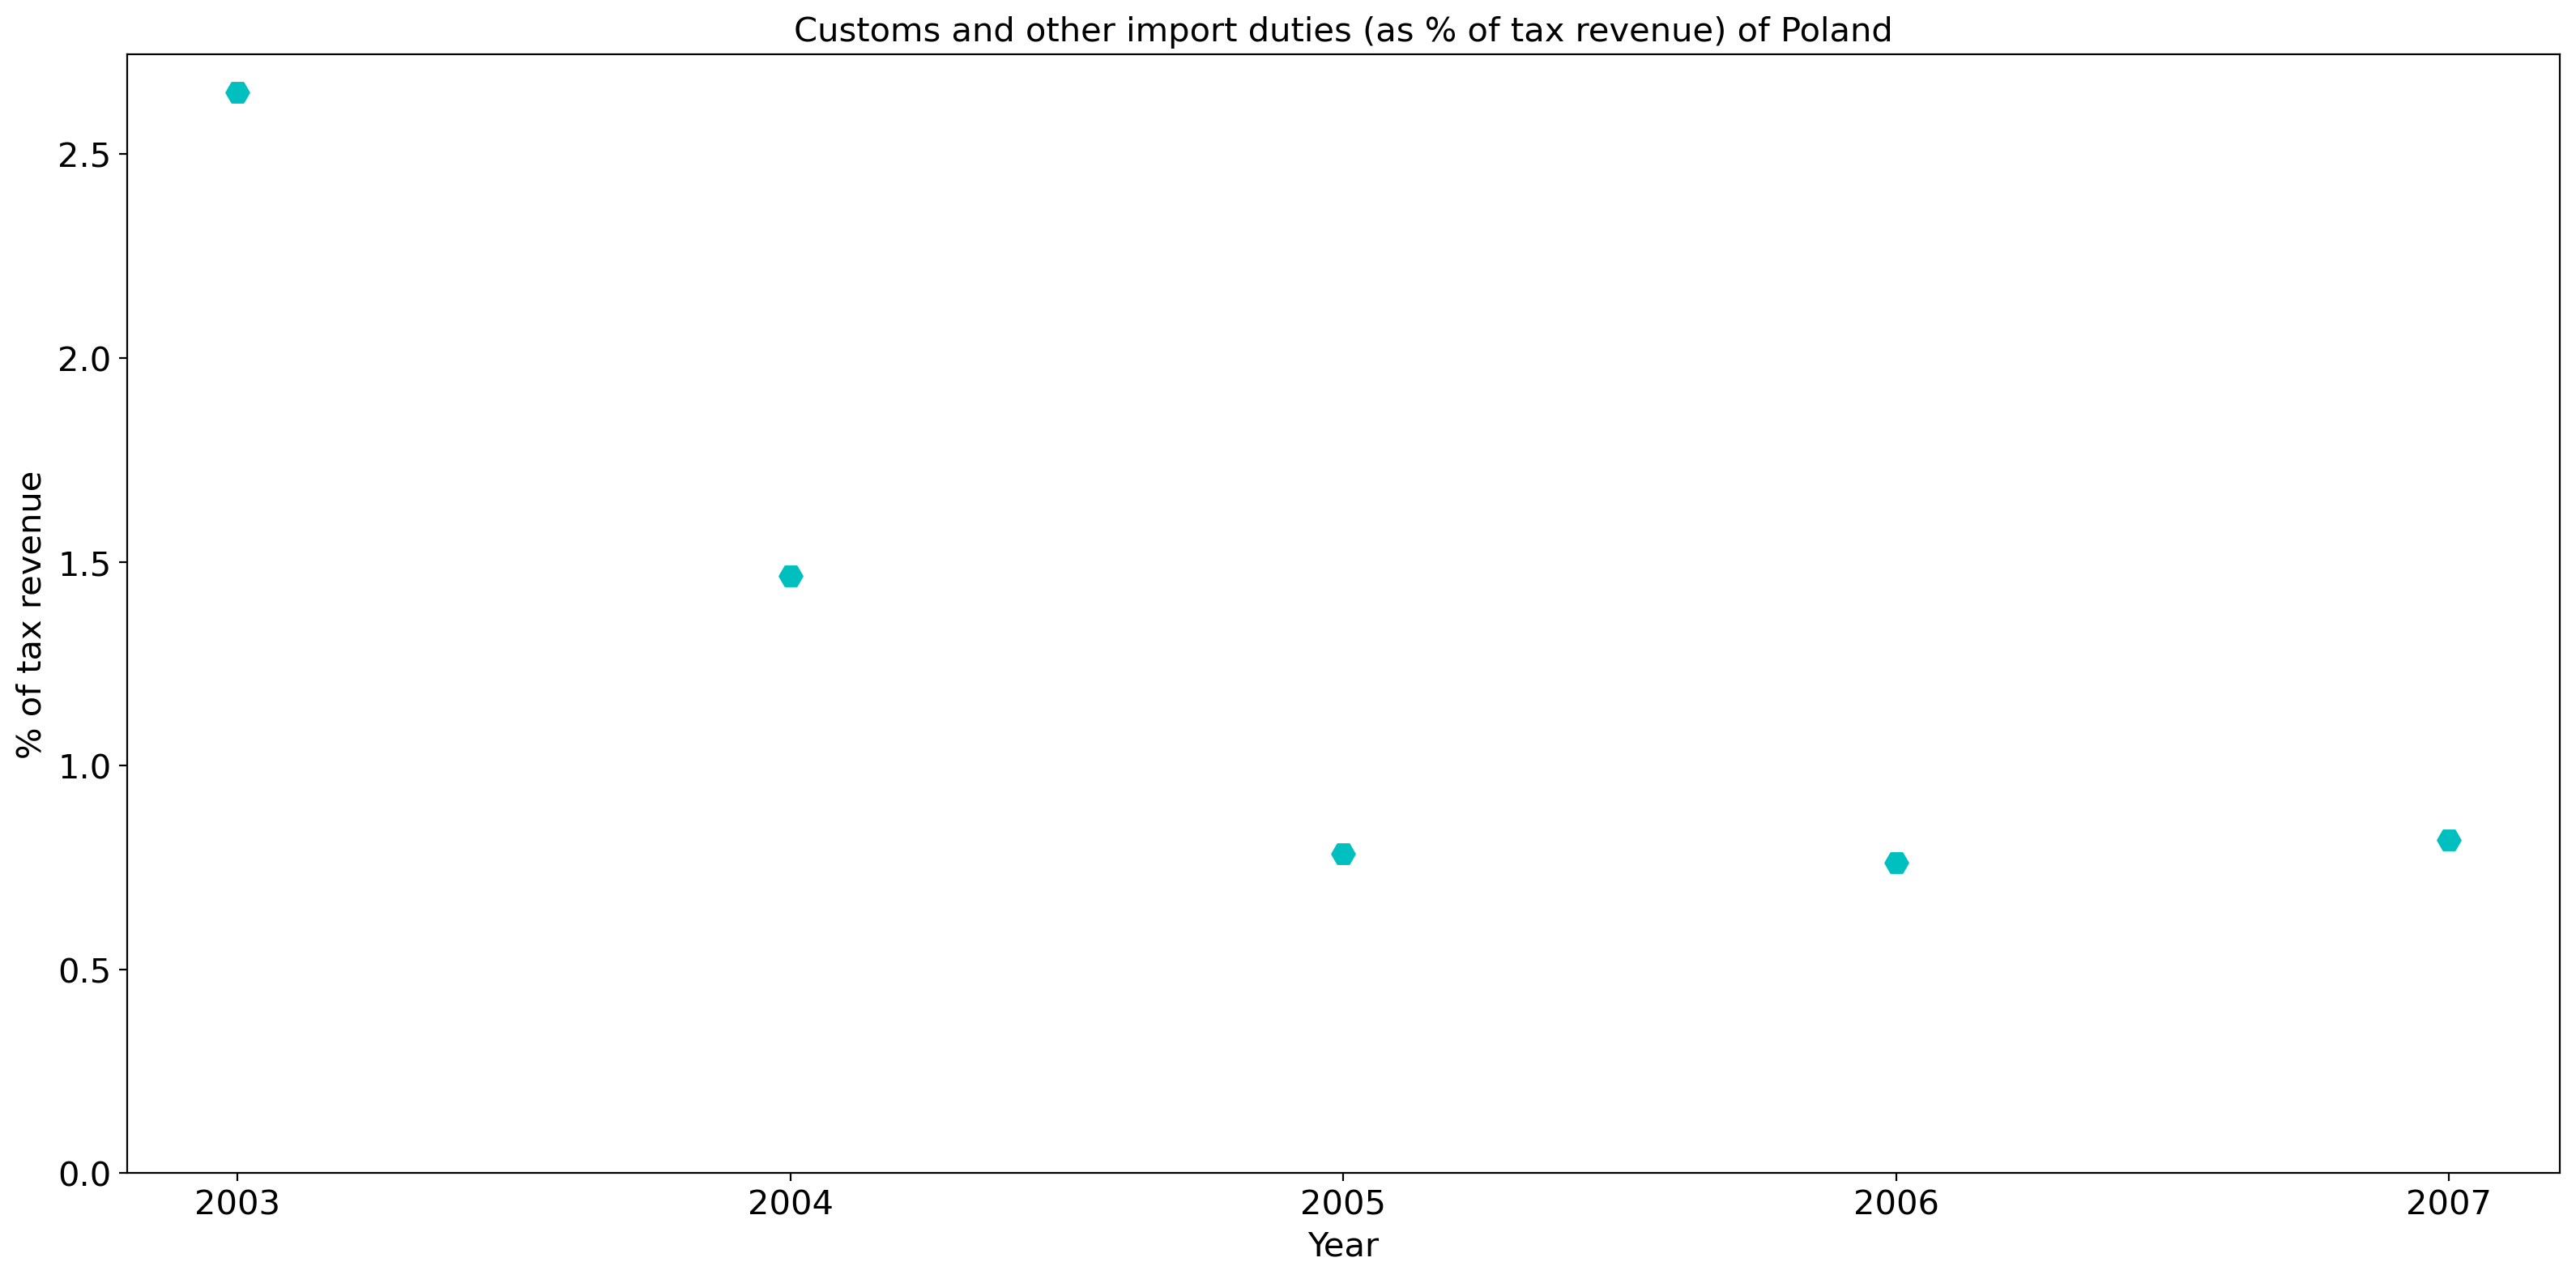

In [9]:
filename = './mydataset/collected_data.json'
figure_dict = []
with open(filename) as f:
    json_data = json.load(f)
#     print(json_data)

    for json_dict in json_data:
#         plot_type = "line_plot" #type

        my_color_list = ['g','r','y','b','c','m','k']
        color = random.choice(my_color_list)
#         print(color1, color2)
        
        my_marker_list = [".","o","^","<","D","P","*","H","+","x"]
        m = random.choice(my_marker_list)
    
        plot_title = json_dict['title']            #title
        img_idx = json_dict['index']                
        
        y = json_dict['y']
        x = json_dict['x']
        x_real = json_dict['x_real']

        x_label = json_dict['x_label']     # x axis label
        y_label = json_dict['y_label']      # y axis label
        
        
        fig, ax = plt.subplots(figsize=(16,8), dpi=200)
        plt.scatter(x, y, s=100, c=color, marker=m)
        plt.xlabel(x_label, fontsize=15)
        plt.ylabel(y_label, fontsize=15)
        
#         for x, y in zip(x, y[1]):
#             plt.text(x, y, y, ha='center', va='bottom', fontsize=20)
            
        plt.title(plot_title, fontsize=15)
        plt.ylim(0)
        plt.xticks(x,x_real, fontsize=15)
        plt.yticks(fontsize=15)
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        fig.tight_layout()
#         plt.show()
        fig.canvas.draw()
        fig.savefig('./Mydataset/Scatter1/Scatter%d.png'%int(img_idx), format='png',dpi=200, bbox_inches='tight')
        
#         print('axes bounding box')
        tight_box = (ax.get_tightbbox(ax.figure.canvas.get_renderer()))
        axes_bbox_x = tight_box.x0
        axes_bbox_y = tight_box.y0
        axes_bbox_w = tight_box.x1 - tight_box.x0
        axes_bbox_h = tight_box.y1 - tight_box.y0
        
        axes_box_dict = {"x":axes_bbox_x,"y":axes_bbox_y,"w":axes_bbox_w,"h":axes_bbox_h}
        axes_info = {"bbox":axes_box_dict}      #axes_info
#         print(axes_bbox_x, axes_bbox_y, axes_bbox_w, axes_bbox_h)
#         print(axes_info)
#         print('\n')
        
        data_list = []
        dict_model = [[],[]]
#         print('(x,y) pixel coordinates')
        xy_pixels = ax.transData.transform(np.vstack([x,y]).T)
        xpix, ypix = xy_pixels.T
        for i in range(len(x)):
#             print(xpix1[i],ypix1[i])
#             print(xpix2[i],ypix2[i])
            
            dic = {"x": xpix[i]-10, "y": ypix[i]-10}
            data_list.append(dic)
            
        dict_model = {"name":plot_title,"color":color, "label":plot_title,"coordinates":data_list,"x":x,"y":y}
#         print(dict_model)  #models
#         print('\n')
        
        xtickslocs = ax.get_xticks()
        ymin, _ = ax.get_ylim()
        xtick_item = []
#         print('xticks pixel coordinates')
#         print(xtickslocs)
        for xtick in xtickslocs:
            xtickloc = ax.transData.transform((xtick, ymin))
            xtick_x = xtickloc[0]
            xtick_y = xtickloc[1]
            
            bbox_item = {"x":xtick_x-10, "y":xtick_y-10}
            xtick_item.append(bbox_item)
            
#             print(xtick_x, xtick_y)
                                                      
        xtick_info = {"value": xtickslocs, "bboxes": xtick_item}   #x-ticks_coordinates
#         print(xtick_info)
#         print('\n')
        
        ytickslocs = ax.get_yticks()
        xmin, _ = ax.get_xlim()
#         print('yticks pixel coordinates')
#         print(ytickslocs)
        ytick_item = []
        for ytick in ytickslocs:
            ytickloc = ax.transData.transform((xmin, ytick))
            ytick_x = ytickloc[0]
            ytick_y = ytickloc[1]
            
            bbox_item = {"x":ytick_x - 10, "y":ytick_y - 10}
            ytick_item.append(bbox_item)
            
#             print(ytick_x, ytick_y)
                                                      
        ytick_info = {"value": ytickslocs, "bboxes": ytick_item}   #y-ticks_coordinates
#         print(ytick_info)
#         print('\n')
        
#         print('xticks label bounding boxes')
        xticklabel_item = []
        for l in ax.get_xticklabels():
            xtickslabel_bbox = l.get_window_extent()
            xtickslabel_bbox_x = xtickslabel_bbox.x0 - 10
            xtickslabel_bbox_y = xtickslabel_bbox.y0 - 10
            xtickslabel_bbox_w = xtickslabel_bbox.x1 - xtickslabel_bbox.x0
            xtickslabel_bbox_h = xtickslabel_bbox.y1 - xtickslabel_bbox.y0
#             print(xtickslabel_bbox_x, xtickslabel_bbox_y, xtickslabel_bbox_w, xtickslabel_bbox_h)
            bbox_item = {"x":xtickslabel_bbox_x, "y":xtickslabel_bbox_y ,"w":xtickslabel_bbox_w, "h":xtickslabel_bbox_h}
            xticklabel_item.append(bbox_item)
            
        xticklabel_info = {"value":x_real, "bboxes":xticklabel_item}  #x-tick_labels
#         print(xticklabel_info)
#         print('\n')
        
#         ax.YAxis.set_label_coords(0,0)
#         print('x axis label bounding boxes')
        xlabel_bbox = ax.xaxis.label.get_window_extent()
        xlabel_bbox_x = xlabel_bbox.x0 - 10
        xlabel_bbox_y = xlabel_bbox.y0 - 10
        xlabel_bbox_w = xlabel_bbox.x1 - xlabel_bbox.x0
        xlabel_bbox_h = xlabel_bbox.y1 - xlabel_bbox.y0
        
        xlabel_box_dict = {"x":xlabel_bbox_x, "y":xlabel_bbox_y, "w":xlabel_bbox_w, "h":xlabel_bbox_h}
        xlabel_info = {"text":x_label, "bbox":xlabel_box_dict}     #x-label
#         print(xlabel_bbox_x, xlabel_bbox_y, xlabel_bbox_w, xlabel_bbox_h)
#         print(xlabel_info)
#         print('\n')
        
#         print('yticks label bounding boxes')
        yticklabel_item = []
        for l in ax.get_yticklabels():
            ytickslabel_bbox = l.get_window_extent()
            ytickslabel_bbox_x = ytickslabel_bbox.x0 - 10
            ytickslabel_bbox_y = ytickslabel_bbox.y0 - 10
            ytickslabel_bbox_w = ytickslabel_bbox.x1 - ytickslabel_bbox.x0
            ytickslabel_bbox_h = ytickslabel_bbox.y1 - ytickslabel_bbox.y0
#             print(ytickslabel_bbox_x, ytickslabel_bbox_y, ytickslabel_bbox_w, ytickslabel_bbox_h)
            bbox_item = {"x":ytickslabel_bbox_x, "y":ytickslabel_bbox_y ,"w":ytickslabel_bbox_w, "h":ytickslabel_bbox_h}
            yticklabel_item.append(bbox_item)
            
        yticklabel_info = {"value":y, "bboxes":yticklabel_item}  #y-tick_labels
#         print(yticklabel_info)
#         print('\n')
        
#         print('y axis label bounding boxes')
        ylabel_bbox = ax.yaxis.label.get_window_extent()
        ylabel_bbox_x = ylabel_bbox.x0 - 10
        ylabel_bbox_y = ylabel_bbox.y0 - 10
        ylabel_bbox_w = ylabel_bbox.x1 - ylabel_bbox.x0
        ylabel_bbox_h = ylabel_bbox.y1 - ylabel_bbox.y0
#         print(ylabel_bbox_x, ylabel_bbox_y, ylabel_bbox_w, ylabel_bbox_h)
        
        ylabel_box_dict = {"x":ylabel_bbox_x, "y":ylabel_bbox_y, "w":ylabel_bbox_w, "h":ylabel_bbox_h}
        ylabel_info = {"text":y_label, "bbox":ylabel_box_dict}     #y-label
#         print(ylabel_info)
#         print('\n')
        
#         print('title bounding box')
        title_bbox = ax.title.get_window_extent()
        title_bbox_x = title_bbox.x0 - 10
        title_bbox_y = title_bbox.y0 - 10
        title_bbox_w = title_bbox.x1 - title_bbox.x0
        title_bbox_h = title_bbox.y1 - title_bbox.y0
#         print(title_bbox_x, title_bbox_y, title_bbox_w, title_bbox_h)
#         print('\n')
        
        titlebox_dict = {"x":title_bbox_x, "y":title_bbox_y, "w":title_bbox_w, "h":title_bbox_h}
        title_info = {"text":plot_title,"bbox":titlebox_dict}     #title
        
        
        x_axis_dict = {"tick_labels":xticklabel_info,"ticks_coordinates":xtick_info,"label":xlabel_info}
        y_axis_dict = {"tick_labels":yticklabel_info,"ticks_coordinates":ytick_info,"label":ylabel_info}
        general_figure_info = {"title":title_info, "x_axis":x_axis_dict,"axes_info":axes_info,"y_axis":y_axis_dict}
        figure_item = {"model":dict_model,"type":"dot_line","general_figure_info":general_figure_info,"image_index":int(img_idx)}
#         print(figure_item)
        
        figure_dict.append(figure_item)
        
#         print(title_info)    #general_figure_info（title）
        
#         break
#         for i,l in enumerate(leg.texts):
#             print(l)

In [10]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
# print(figure_dict)
with open('./Mydataset/Scatter1.json', 'w') as fp:
    json.dump(figure_dict, fp, cls=NpEncoder, indent=2)
# file = open('Scatter_example.json','w',encoding='utf-8')
# json.dump(figure_dict,file,ensure_ascii=False)